In [1]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h1 id="header">Data Exploration</h1>

In [2]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db.shape #initial shape of the dataset is (15589, 21)
db[db.duplicated(keep = False)] #3 duplicated entries are shown and will require cleaning. 
db.drop_duplicates(inplace = True) #we can consider dropping these duplicates due to the exact name, type of travel, year of birth and reward points. This is further illustrated in the report.
db.index = range(15586)
db #non duplicated dataset now has a new shape (15586, 21)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15582,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15583,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15584,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [3]:
db.info() #Missing values present in Year_Birth. Input method to be discussed, potential methods would be median(), mean() or KNN-imputer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

In [4]:
db.describe().T #Out of every variable, the most subjective one (albeit a numerical variable) is RewardPoints. Little to no information is given.
#Although the scaling system is attributed from 0-5, some inputs have entry values starting from 1 and others from 0.
#Should we normalize or create an average value, 0's will turn into 1's as the lowest rank of the interval.
#Wifi is also ranked from 0-6, so we will change it to 1-5.

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


In [5]:
db['Comfort'] = db['Comfort'].replace(0,1)
db['Comfort'].value_counts()

3    3498
4    3475
2    3452
1    3061
5    2100
Name: Comfort, dtype: int64

In [6]:
db['ReceptionSchedule'] = db['ReceptionSchedule'].replace(0,1)
db['ReceptionSchedule'].value_counts()

4    3633
1    3260
5    3171
3    2797
2    2725
Name: ReceptionSchedule, dtype: int64

In [7]:
db['FoodDrink'] = db['FoodDrink'].replace(0,1)
db['FoodDrink'].value_counts()

3    3406
4    3324
2    3282
1    3221
5    2353
Name: FoodDrink, dtype: int64

In [8]:
db['Wifi'] = db['Wifi'].replace(0,1)
db['Wifi'] = db['Wifi'].replace(6,5)
db['Wifi'].value_counts()

4    3703
5    3481
3    3347
2    3245
1    1810
Name: Wifi, dtype: int64

In [9]:
db['Amenities'] = db['Amenities'].replace(0,1)
db['Amenities'].value_counts()

4    4962
5    3583
3    2931
2    2307
1    1803
Name: Amenities, dtype: int64

In [10]:
db['OnlineBooking'] = db['OnlineBooking'].replace(0,1)
db['OnlineBooking'].value_counts()

4    4696
5    4054
3    2779
2    2391
1    1666
Name: OnlineBooking, dtype: int64

In [11]:
db['RoomSpace'] = db['RoomSpace'].replace(0,1)
db['RoomSpace'].value_counts()

4    4785
5    4044
3    2701
2    2624
1    1432
Name: RoomSpace, dtype: int64

In [12]:
db['BarService'] = db['BarService'].replace(0,1)
db['BarService'].value_counts()

4    4201
3    3675
5    3591
2    2272
1    1847
Name: BarService, dtype: int64

#### People who give same value in every category
Only 3: shouldn't be a problem

In [13]:
len(db[db.loc[:,'Comfort':'BarService'].apply(lambda x:min(x)==max(x),1)])

3

In [14]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.878160,1.324472,1.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,3.046837,1.433989,1.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.891313,1.357447,1.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.243809,1.320734,1.0,2.0,3.0,4.00,5.0
Amenities,15586.0,3.398755,1.299903,1.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454318,1.310112,1.0,2.0,4.0,5.00,5.0


In [15]:
db.skew() #Moderate Skew (over |0.5|) for Staff, CheckOut and Cleanliness. All negative, representing left-tailed distributions, but the skewness values are not very high.
#We should explore the type of curves presented here, as their skewness might suggest that these services are the "best" ones out of the assessed ones.
#However, upon checking the detailed view, their mean and median values are higher than 3.

Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort              0.065083
ReceptionSchedule   -0.093768
FoodDrink            0.063672
Location            -0.050057
Wifi                -0.175043
Amenities           -0.455664
Staff               -0.554468
OnlineBooking       -0.471207
PriceQuality        -0.503290
RoomSpace           -0.460433
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.357433
dtype: float64

In [16]:
#db['Staff'].value_counts()
#db['CheckOut'].median()
#db['Cleanliness'].describe()

In [17]:
db[['Staff','CheckOut','Cleanliness']].kurt() #Values for kurtosis are within reason, so no specific outliers.

Staff         -0.859138
CheckOut      -0.225208
Cleanliness   -0.225374
dtype: float64

In [18]:
db.describe(include="O").T #For better analysis, categorical values should be transposed to 0s and 1s, to enable plotting.

,count,unique,top,freq
Churn,15586,2,nochurn,8475
Name,15586,14227,Mr. Michael Smith,9
Longevity,15586,3,yes,12545
TypeTravel,15586,2,business,10754
RoomType,15586,3,single,7442


In [19]:
db['Longevity'] = db['Longevity'].replace('y','yes') #Yes and y both show as different values, will be changed into "yes"
db['Longevity'] = db['Longevity'].replace('yes',1).replace('no',0)
db['Longevity'].value_counts()

1    12712
0     2874
Name: Longevity, dtype: int64

In [20]:
db['Churn'] = db['Churn'].replace('churn',1).replace('nochurn',0)
db['Churn'].value_counts()

0    8475
1    7111
Name: Churn, dtype: int64

In [21]:
db['TypeTravel'] = db['TypeTravel'].replace('business',1).replace('leisure',0) #1 will represent business and 0 will represent leisure
db['TypeTravel'].value_counts()

1    10754
0     4832
Name: TypeTravel, dtype: int64

In [22]:
db['RoomType'] = db['RoomType'].replace('single',0).replace('double',1).replace('suite',2)
db['RoomType'].value_counts() #singles will be represented by 0s, doubles by 1s and suites by 2s.

0    7442
1    7019
2    1125
Name: RoomType, dtype: int64

In [23]:
gender = db['Name'].str.split(' ',expand = True,n=1)[0]
db['Gender'] = gender
db['Gender'] = db['Gender'].replace('Ms.',0).replace('Mr.',1)
#db['Gender']=db['Gender'].map({'Ms.': 'F', 'Mr.': 'M'}) could also be used
#We replace Female with 0 and Male with 1 to apply KNN later on.

db['Gender'].value_counts()

0    7982
1    7604
Name: Gender, dtype: int64

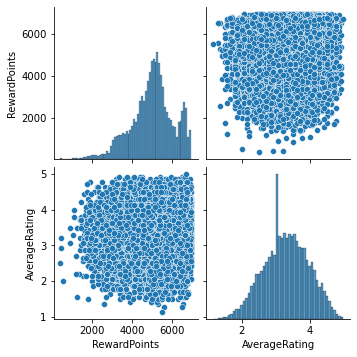

In [24]:
rating = ((db['Comfort'] + db['ReceptionSchedule'] + db['FoodDrink'] + db['Location'] + db['Wifi'] + db['Amenities'] + db['Staff'] + db['OnlineBooking'] + db['PriceQuality'] + db['RoomSpace'] + db['CheckOut'] + db['Checkin'] + db['Cleanliness'] + db['BarService'])/14)
db['AverageRating'] = rating.round(2)
db

rec = db.loc[db.Churn == 0, 'AverageRating']
rec.value_counts()
#rec1.rename(columns = {'Name':'Recurrent'}, inplace = True)
#rec1.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
#rec1

#db['AverageRating'].median() #median and mode are both above 3.3
#We can also bucket Ratings (from under 1, 1-2, 2-3 as detractors, 3-4 as neutral and over 4 as supporters) to see how people behave under each scenario (NPS score 8)

#Exploring RewardPoints with (transformed) categorical variables
db_subset1 = db[['RewardPoints', 'AverageRating']].copy()
sns.pairplot(db_subset1)

In [25]:
# Create 3 distinct buckets of rating variables
db['Staff_Related'] = round((db['ReceptionSchedule'] + db['Staff'] + db['OnlineBooking'] + db['CheckOut'] + db['Checkin'])/5,2)
db['Room_Related'] = round((db['Comfort'] + db['Amenities'] + db['RoomSpace'] + db['Cleanliness'])/4,2)
db['Bar_Related'] = round((db['FoodDrink'] + db['Wifi'] + db['BarService'])/3,2)

In [26]:
#Recurrent Visits - exploration
#This is aimed at getting more insight about recurrent visits and how they would affect RewardPoints

recur1 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth'])['Name'].count())
recur1.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur1.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur1

#39 clients have the same name and year of birth, meaning that they might be recurrent visits.

recur2 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity'])['Name'].count())
recur2.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur2.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur2

#26 of those clients have the same Longevity status, meaning that enough time has passed on 13 clients to change the Longevity status from 0 to 1.

recur3 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity', 'RoomType'])['Name'].count())
recur3.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur3.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur3

#13 of those clients have kept the same RoomType and Longevity. They can potentially be the same people.

recur4 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity', 'RoomType', 'RewardPoints'])['Name'].count())
recur4.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur4.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur4

#No client has the same amount of RewardPoints, meaning that they change according to the number of visits.
#On average, RewardPoints varies 697 points [from 30 to 1892] or 165 [from -645 to 1892]

#db.loc[db.Name == "Ms. Danielle Taylor"]
#For Anthony Smith (1982) - 4508/5275/5554, Business Single and Suite
#For Brian Smith (1979) - 4478/4567, Business Single
#For Christopher Murphy (1979) - 6367/6152, Business Single
#For Jason Bell (1996) - 4539/3404, Business Single
#For John Russel (1977) - 3645/4013, Business Single
#For John Schwartz (1980) - 5607/5577, Business Double
#For Joseph Thomas (1970) - 5051/6570, Business Single
#For Michael Miller (1992) - 3907/4442, Business Single
#For Timothy Lee (1980) - 5113/3221, Business Single - Churn
#For Amanda Smith (1962) - 6190/3906, Business Double - Churn and Business Single
#For Amanda Smith (1969) - 6577/6655, Business Single
#For Cynthia Martin (1991) 4939/4456, Business Single - Churn
#For Dana Anderson (1972) 5807/6452, Business Double
#For Danielle Taylor (1981) 5147/4990, Business Double

,,,,,Recurrent
Name,Year_Birth,Longevity,RoomType,RewardPoints,


In [27]:
db_copy = db.drop(columns = ['Name','FoodDrink', 'ReceptionSchedule','Comfort', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'], axis=1)
db_copy
#db

#We now have 2 db sets, one which is the original (db) and can be used to infer more information about each of the ratings (useful for our proposed 3rd perspective)
#And db_copy, which is a trimmed down version of our original db, with an average rating score.

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related
0,1,1,1974.0,1,0,4907,0,3.29,3.6,3.00,3.00
1,0,1,1965.0,1,0,6724,1,3.14,3.2,3.50,2.67
2,1,1,1973.0,1,0,4365,1,2.71,3.0,3.00,1.67
3,0,1,1993.0,0,1,3849,0,3.14,3.6,3.25,2.67
4,0,1,1989.0,1,0,5376,1,3.57,3.4,3.25,4.33
...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,1,4968,0,2.79,2.4,3.25,2.67
15582,1,0,2000.0,1,1,4970,0,3.57,4.0,2.75,4.33
15583,0,1,1964.0,1,0,4046,1,3.21,3.8,3.25,2.67
15584,0,1,1992.0,0,1,5155,1,4.07,4.0,4.25,4.67


In [28]:
#Filled with KNN Imputer using NaN euclidean distance, with uniformed weighs and 5 neigbours.

#Possibly need to return KNN with sampling by Gender (81.5% females in the no reply bucket)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform", metric='nan_euclidean')
imputer.fit(db_copy)
db_KNN = imputer.transform(db_copy)
db_KNN = pd.DataFrame(db_KNN)
db_KNN[2] = db_KNN[2].round(0)
db_KNN[2].count

db_copy['Year_Birth'] = db_KNN[2]
db_copy['Year_Birth'].isna().value_counts()

db_copy['RewardPoints_Bins'] = pd.cut(db_copy['RewardPoints'], 4, labels=[0, 1, 2, 3])
db_copy.drop(columns = ['RewardPoints'], axis=1, inplace=True)
db_copy

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related,RewardPoints_Bins
0,1,1,1974.0,1,0,0,3.29,3.6,3.00,3.00,2
1,0,1,1965.0,1,0,1,3.14,3.2,3.50,2.67,3
2,1,1,1973.0,1,0,1,2.71,3.0,3.00,1.67,2
3,0,1,1993.0,0,1,0,3.14,3.6,3.25,2.67,2
4,0,1,1989.0,1,0,1,3.57,3.4,3.25,4.33,3
...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,1,0,2.79,2.4,3.25,2.67,2
15582,1,0,2000.0,1,1,0,3.57,4.0,2.75,4.33,2
15583,0,1,1964.0,1,0,1,3.21,3.8,3.25,2.67,2
15584,0,1,1992.0,0,1,1,4.07,4.0,4.25,4.67,2


In [29]:
missingYB = pd.isnull(db['Year_Birth'])
#db[missingYB].query('Gender == 0') # out of 195 no reply in age, 159 are Female. We should adjust KNN accordingly.
db[missingYB]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related
27,0,Ms. Emily Thomas,1,NaN,0,1,4760,1,5,1,...,4,5,4,4,5,0,3.57,4.4,2.50,3.67
126,1,Ms. Elizabeth Tyler,1,NaN,1,1,5151,2,2,2,...,4,3,2,4,2,0,2.43,2.2,3.00,2.00
147,0,Ms. Elizabeth Santos,0,NaN,1,0,5370,4,4,4,...,4,4,4,4,2,0,3.36,3.2,4.00,2.67
168,0,Ms. Elizabeth Lawson,1,NaN,1,0,3669,1,1,1,...,5,5,4,4,5,0,3.64,4.0,3.75,3.67
170,0,Ms. Elizabeth Morgan,1,NaN,1,0,4593,1,1,1,...,4,5,2,4,4,0,3.00,3.4,3.25,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,0,Ms. Elizabeth Williams,1,NaN,0,1,5769,1,4,1,...,1,2,5,2,2,0,2.29,2.8,2.00,2.00
15299,1,Mr. Edward Randall,1,NaN,0,1,4196,4,5,5,...,4,4,3,4,1,1,3.29,2.8,4.25,2.33
15385,0,Ms. Elizabeth Carrillo,1,NaN,1,0,6448,3,3,3,...,5,5,3,5,5,0,4.14,4.0,4.50,4.00
15442,0,Ms. Elizabeth Wilson,1,NaN,1,0,5438,4,4,5,...,4,5,4,4,5,0,4.50,4.6,4.25,5.00


In [30]:
#From this point in exploration, we use db_copy for some visual exploration
db_copy.describe()
db_copy['Longevity'].value_counts()

1    12712
0     2874
Name: Longevity, dtype: int64

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

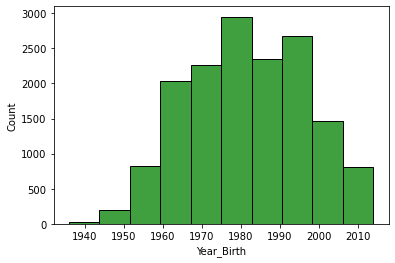

In [31]:
sns.histplot(db_copy['Year_Birth'], color="g", bins = 10)


<AxesSubplot:>

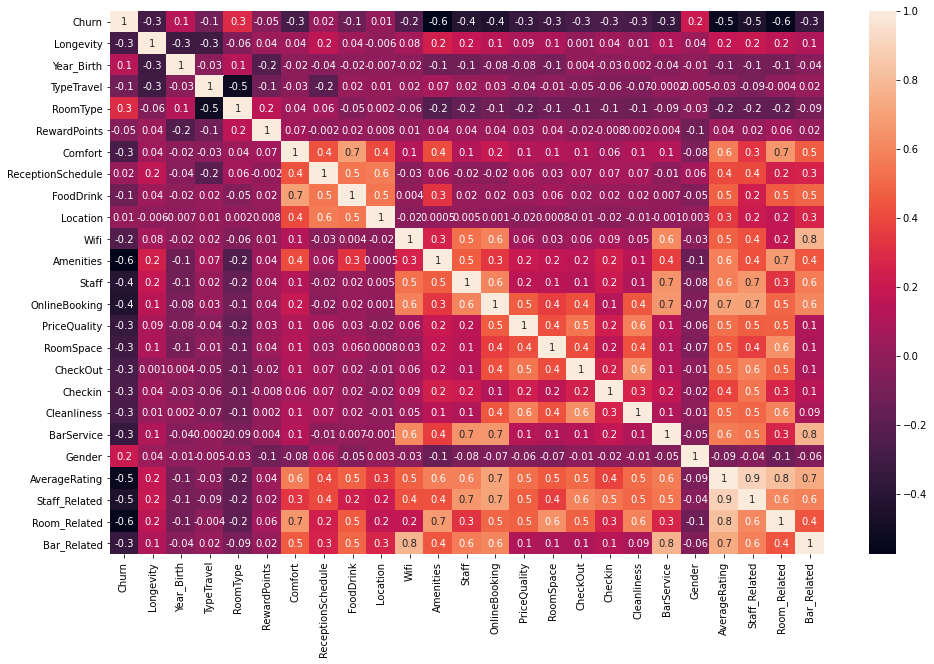

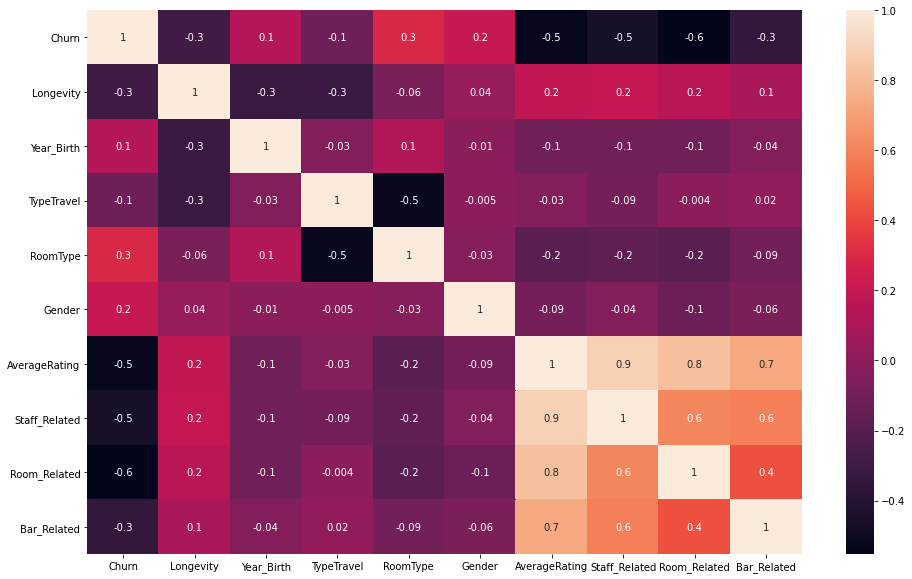

In [32]:
#Heatmap

db_vis = db.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_vis, annot=True, fmt = '.1g')

db_visredux = db_copy.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_visredux, annot=True, fmt = '.1g') 

#Satisfaction "buckets"
#1 - Comfort, ReceptionSchedule, FoodDrink, Location
#2 - Amenities, Wifi, OnlineBooking, Staff, BarService
#3 - PriceQuality, RoomSpace, CheckOut, CheckIn, Cleanliness

#Insights
#Churn goes down with higher Average Rating (more specifically with Amenities, Staff and Online Booking)
#Customers who travel for business tend to book more single rooms
#Customers who book doubles and suites tend to churn more
#More recent customers (longevity = 0) tend to churn more
#Long-time customers (longevity =1) are more likely to be older and travel for business

# Phase 2

## Customer Satisfaction

## Customer Characteristics

## Hotel Perspective

In [33]:
db_hotel = db.drop(columns = ['Name','Longevity', 'Year_Birth','TypeTravel', 'RoomType', 'RewardPoints', 'AverageRating', 'Staff_Related', 'Room_Related', 'Bar_Related','Gender'], axis=1)
print(db_hotel.shape)
db_hotel.head(2)

(15586, 15)


,Churn,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,3,4,1,4,4,3,4,3,3,3,3,4,3,4
1,0,1,1,1,1,5,3,4,5,5,5,5,1,5,2


In [34]:
# Aplicar o algoritmo de PCA para terminar o processo de Data Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle' , svd_solver='full') # Minka’s MLE algorithm is used to guess the dimension
pca.fit(db_hotel)

PCA(n_components='mle', svd_solver='full')

In [66]:
# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right
# singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.
# print(pca.components_) # dimensão: n_components x n_components

# The amount of variance explained by each of the selected components. Variance estimation: n_samples - 1 degrees of freedom
print("Number of Components: ",len(pca.explained_variance_),"\n") # dimensão: n_components
print("% Variance explained by each of the selected components:")
print((pca.explained_variance_ratio_)*100,"\n") # dimensão: n_components
commulative = np.cumsum(pca.explained_variance_ratio_)
nComponents = np.argmax(commulative>0.85)
print(f"Sum of first {nComponents+1} components passes the 85% threshold: {round(sum(pca.explained_variance_ratio_[0:nComponents+1])*100,2)}%")


Number of Components:  14 

% Variance explained by each of the selected components:
[27.42946752 19.84045766 13.98712464  7.36826114  6.23759684  4.47914404
  3.61116393  3.32941407  3.0476295   2.47872063  2.16396823  2.0887222
  1.99714854  1.36172691] 

Sum of first 8 components passes the 85% threshold: 86.28%


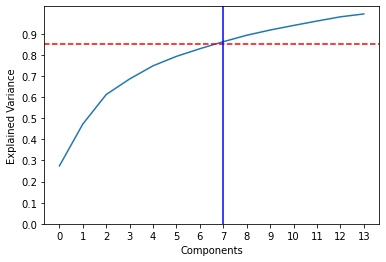

In [68]:
plt.plot(commulative)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.xticks(np.arange(0, len(pca.explained_variance_), step=1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.axhline(y = 0.85, color = 'r', linestyle = 'dashed')  
plt.axvline(x = nComponents, color = 'b', label = 'axvline - full height')
plt.show()

##### Check the variables that accumulate the most importance in the PCA analysis

In [37]:
sumEigenVectors = [abs(x) for x in pca.components_[0:8]]
sumEigenVectors = list(map(sum,zip(*sumEigenVectors)))
Eigen = db_hotel.iloc[0:0]
Eigen.loc[len(sumEigenVectors)] = sumEigenVectors
Eigen

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Churn,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
15,0.379707,1.718616,2.242894,1.32736,1.948525,1.921576,1.624544,1.739638,1.224498,1.56164,2.017545,1.242831,1.975843,1.219997,1.156527


##### Check which variables have the most importance in the sum of the first 8 principal components

In [38]:
Eigen.T.sort_values(15, ascending=False).T

,ReceptionSchedule,RoomSpace,Checkin,Location,Wifi,Staff,Comfort,Amenities,PriceQuality,FoodDrink,CheckOut,OnlineBooking,Cleanliness,BarService,Churn
15,2.242894,2.017545,1.975843,1.948525,1.921576,1.739638,1.718616,1.624544,1.56164,1.32736,1.242831,1.224498,1.219997,1.156527,0.379707


##### Check principal components correlation with variables
- Component 0: Strong correlation with Online Booking
- Component 1: Strong correlation with Reception Schedule, FoodDrink and Location
- Component 2: Strong correlation with Price Quality, Check Out and Cleanlines
- Component 3: Strong correlation with Amenities
- Component 4: Strong correlation with Check-in
- Component 5: Strong correlation with Room Space
- Component 6: Strong correlation with Wifi and Amenities
- Component 7: Strong correlation with Reception Schedule and Location

No correlation with Churn nor Comfort

In [41]:
hotel_components = pd.DataFrame(pca.components_[0:8], columns = db_hotel.columns).T
hotel_components.style.apply(lambda x: ["background: #6dedeb" if abs(v) > 0.5 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7
Churn,0.112480,0.020518,0.015522,0.112733,-0.019946,-0.019080,0.048291,0.031137
Comfort,-0.260124,0.390673,0.046463,-0.231656,0.259694,-0.161116,0.344781,0.024111
ReceptionSchedule,-0.136120,0.503812,-0.023028,0.326459,-0.311815,0.032468,-0.294482,0.614711
FoodDrink,-0.185490,0.505054,0.060473,-0.166056,0.153763,-0.039477,0.147004,-0.070043
Location,-0.101609,0.434160,0.053910,0.361772,-0.110241,0.159140,-0.065805,-0.661887
Wifi,-0.308113,-0.175869,0.347249,0.239428,0.008943,-0.099943,0.465230,0.276801
Amenities,-0.311364,0.053101,0.123092,-0.633734,0.102577,-0.055471,-0.307348,0.037857
Staff,-0.358442,-0.171154,0.288330,-0.009999,-0.113424,0.172318,-0.446166,-0.179806
OnlineBooking,-0.420440,-0.191719,0.025953,0.248347,0.171407,-0.067136,0.053732,-0.045764
PriceQuality,-0.253038,-0.071357,-0.423744,0.045974,0.049597,-0.275625,-0.349695,0.092610


##### Apply PCA to data frame

In [40]:
# Aplicar a transformação e converter o resultado num data frame

n_components = 14 # o número total de componentes que foi devolvido do PCA

columns = ['pca_%i' % i for i in range(n_components)]
db_hotel_pca = pd.DataFrame(pca.transform(db_hotel), columns=columns, index=db_hotel.index)
db_hotel_pca_9 = db_hotel_pca.drop(db_hotel_pca.loc[:, 'pca_8':'pca_13'], axis=1) # Reduce to 9 components
db_hotel_pca_9

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,0.212171,-0.139591,1.310856,1.070707,-1.605584,0.414099,-0.148789,0.165607
1,-0.352767,-4.288861,-1.860597,1.199965,2.761558,-0.098473,-0.227227,0.741818
2,2.339980,1.196379,0.276915,-1.078484,0.894192,-0.669424,-1.903630,-0.597467
3,-0.291953,-4.116617,-0.371148,-0.960307,-0.299136,0.292885,-0.533668,0.079258
4,-2.203686,-2.297479,1.751964,0.232920,2.270343,-0.954962,-1.579620,0.415831
...,...,...,...,...,...,...,...,...
15581,1.561220,-2.160081,-0.102116,-0.119663,0.714895,1.804297,0.031223,-0.099647
15582,-1.552597,-0.948387,2.718453,1.098000,-1.143327,-1.808938,0.405434,-0.345162
15583,-0.518554,-4.167408,-0.576963,-1.368909,-1.222096,0.483681,-0.705638,-0.314492
15584,-3.186533,0.285171,1.661311,0.560140,0.947837,1.470755,1.161210,-0.607470
